<a href="https://colab.research.google.com/github/BiggusMaximus/tensorflow_learn/blob/main/2_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# Convolution Neural Network**

Dengan menggunakan konvolusi antara filter matriks terhadap gambar menggunakan kernel
https://en.wikipedia.org/wiki/Kernel_(image_processing)

In [ ]:
import tensorflow as tf
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.models.Sequential([
                                   #32 filter matriks 3x3 terhadap pixel single byte 28x28, membuat pixel berkurang menjadi 26x26
                                   tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
                                   #memilih pixel terbesar dari 2x2, 4 pixel, mengubah 26x6 pixel menjadi 13x13
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   #melakukan 32 filter matriks 3x3, membuat pixel berkurang menjadi 11x11
                                   tf.keras.layers.Conv2D(32, (3,3), activation='relu'),

                                   #meratakan dimensi dari 11x11 dengan 32 filter menjadi 3872
                                   tf.keras.layers.Flatten(),
                                   #menerapkan hidden layer 128, 128 input + 1 bias , 129x3872
                                   tf.keras.layers.Dense(128, activation = 'relu'),
                                   #nilai keluaran 10 layer
                                   tf.keras.layers.Dense(10, activation = 'softmax')

])
#(none, 26,26,32) none merupakan batch size, 26x26 merupakan ukuran dari pixel , dan jumlah gambar ada 32
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 3872)              0         
                                                                 
 dense (Dense)               (None, 128)               495744    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)



MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 50s 26ms/step - loss: 0.4040 - accuracy: 0.8548
Epoch 2/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.2639 - accuracy: 0.9034
Epoch 3/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2168 - accuracy: 0.9197
Epoch 4/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.1806 - accuracy: 0.9340
Epoch 5/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1537 - accuracy: 0.9431


In [ ]:
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL EVALUATION:
313/313 [==============================] - 2s 5ms/step - loss: 0.2374 - accuracy: 0.9165


IndexError: ignored

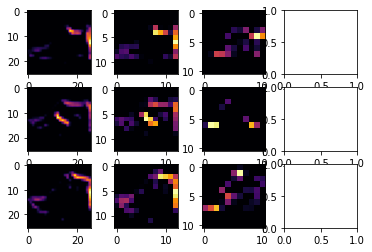

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)